In [664]:
import numpy as np
import pandas as pd
import nltk,re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

df=pd.read_csv('twitter_validation.csv',header=None,encoding='ISO-8859-1') #encoding : there will be emojis,special characters,etc in text,
df.columns=['ID','Media','Target','Text']


In [665]:
df.head()

,ID,Media,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [666]:
df.tail()

,ID,Media,Target,Text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [667]:
df.shape

(1000, 4)

In [668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1000 non-null   int64 
 1   Media   1000 non-null   object
 2   Target  1000 non-null   object
 3   Text    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [669]:
df.isna().sum()

ID        0
Media     0
Target    0
Text      0
dtype: int64

In [670]:
a=df['Target'].value_counts()
a

Target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

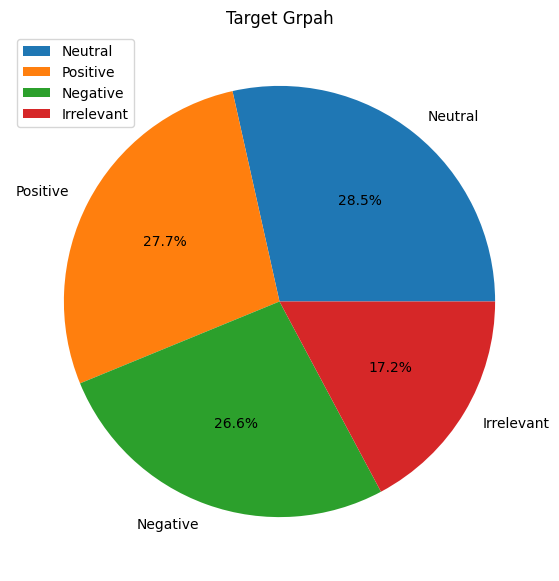

In [671]:
plt.figure(figsize=(8,7))

plt.pie(a.values,labels=a.index,autopct='%1.1f%%')
plt.title("Target Grpah")

plt.legend(loc='upper left')
plt.show()

In [672]:
b=df['Media'].value_counts()
b

Media
RedDeadRedemption(RDR)               40
johnson&johnson                      39
PlayerUnknownsBattlegrounds(PUBG)    38
FIFA                                 38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Facebook                             33
Verizon                              32
Hearthstone                          32
Overwatch                            32
CS-GO                                32
CallOfDuty                           31
WorldOfCraft                         30
Cyberpunk2077                        30
MaddenNFL                            29
Microsoft                            28
Dota2                             

In [674]:
df.drop(df.index[(df['Target']=='Irrelevant')],inplace=True,axis=0)
df

,ID,Media,Target,Text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [675]:
df['Target'].value_counts()

Target
Neutral     285
Positive    277
Negative    266
Name: count, dtype: int64

In [ ]:
df.reset_index(drop=True,inplace=True)#reset index
df

,ID,Media,Target,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [677]:
df.drop(columns=['ID','Media'],inplace=True,axis=1)
df.head()

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...


In [678]:
df['Target']=df['Target'].map({'Neutral':0,'Positive':1,'Negative':-1})
df.dtypes

Target     int64
Text      object
dtype: object

In [679]:
tweets=df.Text

In [680]:
from nltk.tokenize import TweetTokenizer
token=TweetTokenizer()
tweets=tweets.apply(lambda x:token.tokenize(x)).apply(lambda x:" ".join(x))
print(token)

In [681]:
#remove spcl characters
tweets=tweets.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [682]:
#len words above 3
tweets=tweets.apply(lambda x:' '.join([w for w in token.tokenize(x) if len(w)>=3]))

In [683]:
from nltk.stem import SnowballStemmer
stemming=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemming.stem(i) for i in token.tokenize(x)]).apply(lambda x:" ".join(x))

In [684]:
stopword=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in token.tokenize(x) if x not in stopword]).apply(lambda x:" ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: Text, Length: 828, dtype: object

In [685]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13426 stored elements and shape (828, 3851)>

In [686]:
# 828 reviws , 3851 numerical values

In [687]:
print(data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13426 stored elements and shape (828, 3851)>
  Coords	Values
  (0, 524)	0.49155204783978756
  (0, 2310)	0.38864111655856126
  (0, 359)	0.1515362387424402
  (0, 622)	0.22681557001542715
  (0, 1852)	0.24577602391989378
  (0, 557)	0.2608257828483461
  (0, 2792)	0.2608257828483461
  (0, 800)	0.21432663830218204
  (0, 853)	0.17354914655342313
  (0, 287)	0.22681557001542715
  (0, 2016)	0.13277165480466424
  (0, 1130)	0.23509805002803952
  (0, 998)	0.2608257828483461
  (0, 681)	0.2608257828483461
  (1, 2175)	0.2369160822487817
  (1, 3697)	0.2529360051104236
  (1, 2493)	0.30168753669061715
  (1, 1364)	0.1452425622664992
  (1, 3743)	0.3527122902262124
  (1, 3695)	0.2191826024944043
  (1, 1408)	0.3913110262186893
  (1, 2589)	0.3687322130878543
  (1, 2923)	0.3913110262186893
  (1, 790)	0.3913110262186893
  (2, 950)	0.3041178383627944
  :	:
  (825, 841)	0.2231382318198915
  (825, 1615)	0.2498447652541199
  (825, 3553)	0.2539972075168817

In [688]:
y=df.iloc[:,0]
y

0      0
1     -1
2     -1
3      0
4     -1
      ..
823   -1
824    1
825    1
826    1
827    0
Name: Target, Length: 828, dtype: int64

In [689]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=1)
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9400 stored elements and shape (579, 3851)>

In [690]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4026 stored elements and shape (249, 3851)>

In [691]:
y_train

68     0
76    -1
180   -1
121    0
812    1
      ..
715   -1
767   -1
72     1
235    1
37     0
Name: Target, Length: 579, dtype: int64

In [692]:
y_test

370    1
449    0
809    0
577    1
571    1
      ..
594    1
40     0
89     1
592   -1
631    0
Name: Target, Length: 249, dtype: int64

In [693]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler(with_mean=False)
scalar.fit(x_train)  #only x_train coz mean & std_deviation of training data is used

x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [694]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


knn = KNeighborsClassifier(n_neighbors=7)
bayes = GaussianNB()
sup = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)

# List of models
lst = [knn, bayes, sup, dt, rf]

In [695]:
x_train = x_train.toarray()  # Convert sparse to dense
x_test = x_test.toarray()


In [696]:
for i in lst:
    print("Model name is **",i,'**')
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('*'*100)
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('*'*100)
    sc=accuracy_score(y_test,y_pred)
    print(sc)
    print('*'*100)
    rep=classification_report(y_test,y_pred)
    print(rep)

Model name is ** KNeighborsClassifier(n_neighbors=7) **
****************************************************************************************************
[[70  0  4]
 [89  2  0]
 [78  0  6]]
****************************************************************************************************
0.3132530120481928
****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.30      0.95      0.45        74
           0       1.00      0.02      0.04        91
           1       0.60      0.07      0.13        84

    accuracy                           0.31       249
   macro avg       0.63      0.35      0.21       249
weighted avg       0.66      0.31      0.19       249

Model name is ** GaussianNB() **
****************************************************************************************************
[[37 20 17]
 [23 36 32]
 [39 18 27]]
*********************************